In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

df = pd.read_csv("clean_ltcf_covidyay995.csv", low_memory=False)

df.columns = df.columns.str.strip()

np.random.seed(0)

print("YEAR" in df.columns)  # Should return True
print(df.columns.tolist())

# Generate synthetic 2D data
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # 100 points from -3 to 3
y = 0.5 * X**3 - X**2 + 2 * X + np.random.normal(0, 3, X.shape)  # cubic relationship with noise

True
['FAC_NAME', 'YEAR', 'DATA_IND', 'ResCare', 'COUNTY', 'License Category', 'TYPE_CNTRL', 'HSA', 'PHONE', 'ADDRESS', 'CITY', 'ZIP_CODE', 'MCAL_PRO#', 'ADMINIS', 'RELATED', 'BED_END', 'BED_AVG', 'Bed Size', 'Licensed Bed Days', 'DAY_TOTL', 'OCCUP', 'ADMITS', 'DISCHS', 'DAY_MCAR', 'DAY_MCAL', 'DAY_SELF', 'DAY_MGD', 'DAY_OTH', 'Type of Care', 'DAY_SN', 'GR_AN_TOTL', 'DFR_TOTL', 'OTH_OP_REV', 'TOT_HC_EXP', 'GR_RT_MCAR', 'GR_RT_MCAL', 'GR_RT_SELF', 'GR_RT_MGD', 'GR_SN', 'GR_AN_MCAR_IP', 'GR_AN_MCAL_IP', 'GR_AN_MGD_IP', 'GR_PSUPPLY', 'GR_PT', 'GR_OT', 'GR_SP', 'GR_PHARM', 'GR_LAB', 'EQUIPMENT', 'ACC_DEPREC', 'ACID_RATIO', 'Cash & Securities', 'PRDHR_MGT', 'PRDHR_RN', 'PRDHR_LVN', 'PRDHR_NA', 'PRDHR_POM', 'PRDHR_HKP', 'PRDHR_LL', 'PRDHR_DIET', 'PRDHR_SS', 'PRDHR_ACTV', 'PRDHR_INSV', 'PRDHR_ADMN', 'PRDHR_TOTL', 'TMP_HR_RN', 'TMP_HR_LVN', 'TMP_HR_NA', 'TMP_HR_TOT', 'S&W_MGT', 'S&W_RN', 'S&W_LVN', 'S&W_NA', 'S&W_POM', 'S&W_HKP', 'S&W_LL', 'S&W_DIET', 'S&W_SS', 'S&W_ACTV', 'S&W_INSV', 'S&W_ADM

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filter for years 2019–2022
filter_1 = df['YEAR'].isin([2019, 2020, 2021, 2022])
filtered_df = df[filter_1] 

# Select relevant columns
selected_columns = ['TOT_HC_EXP']

# Filter dataset to selected columns and drop rows with missing values

model_df = filtered_df.dropna(axis = 1)

for category_1 in model_df.columns:
    try:
        model_df[category_1] = model_df[category_1].str.replace(",","")
        model_df[category_1] = model_df[category_1].str.replace("(","")
        model_df[category_1] = model_df[category_1].str.replace(")","")
    except:
        pass
    if category_1 == 'TOT_HC_EXP':
        model_df[category_1] = model_df[category_1].astype(float)
    try:
        model_df[category_1] = model_df[category_1].astype(float)
    except:
        pass
    if pd.api.types.is_string_dtype(model_df[category_1]):
        model_df = model_df.drop(columns=[category_1])

X = model_df.drop(columns=['TOT_HC_EXP'])
y = model_df['TOT_HC_EXP']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(model.coef_)
print (mse, r2)

[ 4.72678940e+05 -3.55715308e+05  3.30214288e+05  1.24675162e+02
  2.47192611e+02 -2.07837909e+04 -5.70827732e+05 -1.19808368e+04
 -2.19100910e+04  2.19632793e+04 -1.60945284e+06 -5.85740781e+05
 -1.42792040e+05  7.28532821e+05]
4873605560415.441 0.857203785385949


/tmp/ipykernel_3474226/793689010.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[category_1] = model_df[category_1].str.replace(",","")
/tmp/ipykernel_3474226/793689010.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[category_1] = model_df[category_1].str.replace("(","")
/tmp/ipykernel_3474226/793689010.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [118]:
covid_model = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model to training data
covid_model.fit(X_train, y_train)
features=covid_model[:-1].get_feature_names_out()
importances = permutation_importance(covid_model, X_train, y_train)
sorted_importances = importances["importances_mean"].argsort()
ordered_importances = importances["importances_mean"][sorted_importances]
ordered_features = features[sorted_importances]
print(ordered_features)
print(ordered_importances)

# Predict on test data
predictions = covid_model.predict(X_test)

# Compute Mean Squared Error (for training data)
mse_train = mean_squared_error(y_train, covid_model.predict(X_train))
print("\n\nMean Squared Error on Train Data:", mse_train, "\n\n")

# Compute Mean Squared Error (for test data)
mse = mean_squared_error(y_test, predictions)
print("\n\nMean Squared Error on Test Data:", mse, "\n\n")

['ACID_RATIO' 'Governmental' 'Total_Res_Deaths' 'Investor' 'YEAR'
 'Total_Res_Cases' 'Total_S_Cases' 'Licensed Bed Days' 'DAY_TOTL'
 'BED_AVG' 'BED_END' '1-59 Beds' '100+ Beds' '60-99 Beds']
[2.45661837e-04 7.74368813e-04 1.32235185e-03 2.16868828e-03
 9.33985014e-03 1.25814482e-02 2.84383396e-02 3.26101553e-01
 8.54968754e-01 1.28866721e+01 1.53283131e+01 4.19742328e+25
 5.14979934e+25 5.70264203e+25]


Mean Squared Error on Train Data: 5436437840756.889 




Mean Squared Error on Test Data: 4878429095856.42 




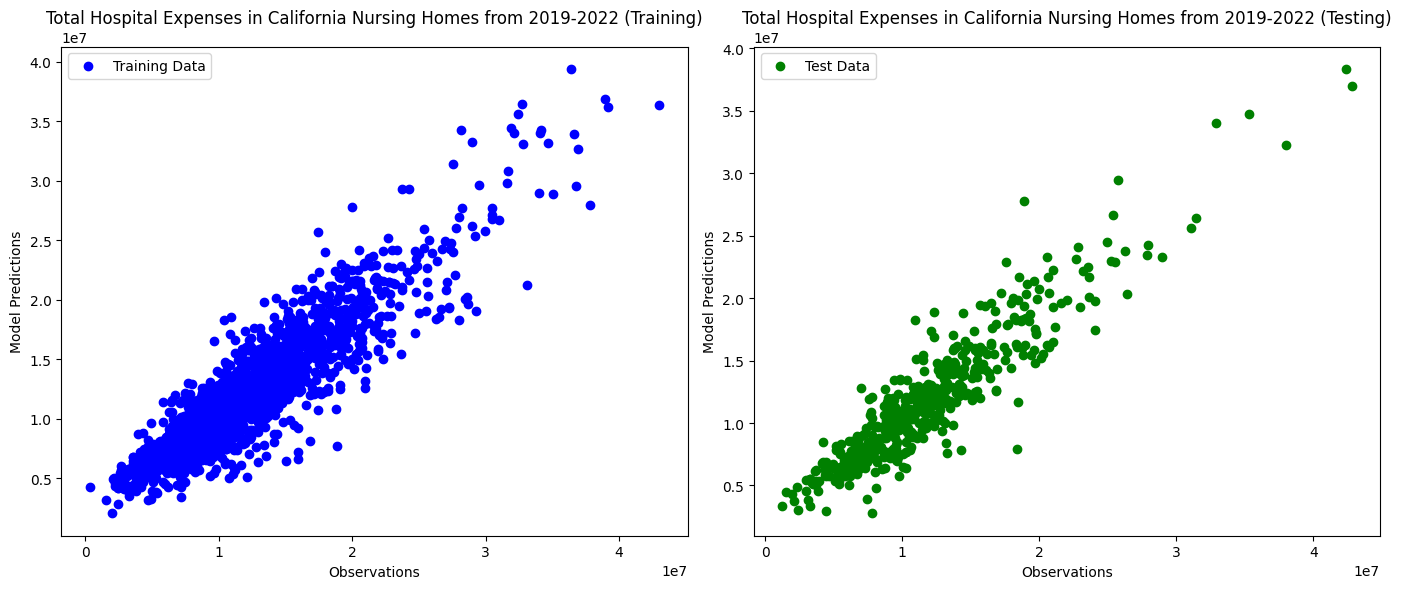

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot training data
axes[0].scatter(y_train, covid_model.predict(X_train), color="blue", label="Training Data")
axes[0].set_xlabel("Observations")
axes[0].set_ylabel("Model Predictions")
axes[0].set_title("Total Hospital Expenses in California Nursing Homes from 2019-2022 (Training)")
axes[0].legend()

# Plot testing data
axes[1].scatter(y_test, covid_model.predict(X_test), color="green", label="Test Data")
axes[1].set_xlabel("Observations")
axes[1].set_ylabel("Model Predictions")
axes[1].set_title("Total Hospital Expenses in California Nursing Homes from 2019-2022 (Testing)")
axes[1].legend()

plt.tight_layout()
plt.show()

In [120]:
pd.DataFrame(zip(X.columns, model.coef_))

,0,1
0,YEAR,4.726789e+05
1,BED_END,-3.557153e+05
2,BED_AVG,3.302143e+05
3,Licensed Bed Days,1.246752e+02
4,DAY_TOTL,2.471926e+02
5,ACID_RATIO,-2.078379e+04
6,Investor,-5.708277e+05
7,Total_Res_Cases,-1.198084e+04
8,Total_Res_Deaths,-2.191009e+04
9,Total_S_Cases,2.196328e+04


In [121]:
train_errors = []
test_errors = []
degrees = range(0, 3) 

# Iterate over polynomial degrees
for degree in degrees:
    print(degree)
    # Set up polynomial regression model with the current degree
    covid_polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Fit the model to the training data
    covid_polynomial_model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = covid_polynomial_model.predict(X_train)
    y_test_pred = covid_polynomial_model.predict(X_test)

    # Compute Mean Squared Errors for training and testing sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

0
1
2


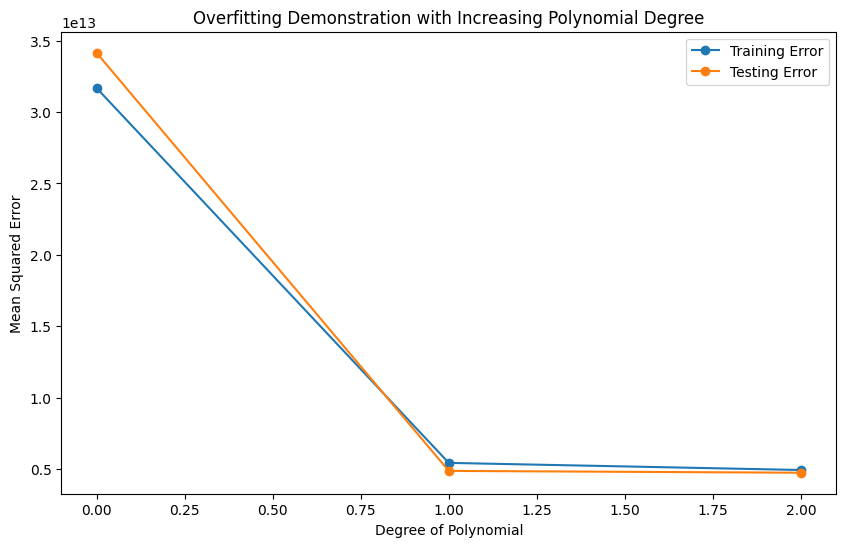



Mean Squared Error on Train Data: [np.float64(31681150227795.887), np.float64(5435410685769.424), np.float64(4937187995800.228)] 




Mean Squared Error on Test Data: [np.float64(34150576334863.39), np.float64(4873605560415.374), np.float64(4746293335575.056)] 




In [122]:
# Set random seed for reproducibility
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label="Training Error", marker="o")
plt.plot(degrees, test_errors, label="Testing Error", marker="o")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Overfitting Demonstration with Increasing Polynomial Degree")
plt.legend()
plt.show()

print("\n\nMean Squared Error on Train Data:", train_errors, "\n\n")
print("\n\nMean Squared Error on Test Data:", test_errors, "\n\n")